# Calories Burnt Prediction Project

This project aims to predict the number of calories burned during physical activities based on various physiological and demographic variables. Accurate prediction of calories burned is crucial for fitness tracking, dietary planning, and personalized health recommendations.

## Datasets Overview

We are working with two datasets that provide detailed information on users' physical attributes and exercise metrics:

### 1. Exercise Data
This dataset contains information about users during their exercise sessions. The key variables include:

- **User_ID**: Unique identifier for each user
- **Gender**: Gender of the user (Male/Female)
- **Age**: Age of the user (in years)
- **Height**: Height of the user (in cm)
- **Weight**: Weight of the user (in kg)
- **Duration**: Duration of the exercise (in minutes)
- **Heart_Rate**: Average heart rate during the exercise (in bpm)
- **Body_Temp**: Body temperature during the exercise (in °C)

### 2. Calories Data
This dataset is an extension of the Exercise Data, including the target variable 'Calories', which represents the number of calories burned during the exercise. The key variables include:

- **User_ID**: Unique identifier for each user
- **Gender**: Gender of the user (Male/Female)
- **Age**: Age of the user (in years)
- **Height**: Height of the user (in cm)
- **Weight**: Weight of the user (in kg)
- **Duration**: Duration of the exercise (in minutes)
- **Heart_Rate**: Average heart rate during the exercise (in bpm)
- **Body_Temp**: Body temperature during the exercise (in °C)
- **Calories**: The number of calories burned during the exercise session

## Project Objective

The main objective of this project is to build a predictive model that estimates the number of calories burned based on user demographics and exercise metrics. By combining and analyzing these datasets, we aim to derive insights that can enhance personal fitness tracking and promote healthier lifestyles.

## Data Preprocessing

Before starting the modeling process, we will combine these two datasets based on the `User_ID` to create a comprehensive dataset that includes all relevant variables. This combined dataset will then be used for exploratory data analysis (EDA) and machine learning model training.


### 1. Importing the dependencies

In [3]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 3.6 MB/s eta 0:00:35
   ---------------------------------------- 0.5/124.9 MB 7.9 MB/s eta 0:00:16
   ---------------------------------------- 0.9/124.9 MB 8.4 MB/s eta 0:00:15
   ---------------------------------------- 0.9/124.9 MB 8.4 MB/s eta 0:00:15
    --------------------------------------- 1.6/124.9 MB 7.3 MB/s eta 0:00:17
    --------------------------------------- 1.9/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.1/124.9 MB 6.7 MB/s eta 0:00:19
    --------------------------------------- 2.3/124.9 MB 7.1 MB/s eta 0:00:18
    --------------------------------------- 2.6/124.9 MB 7.0 MB/s eta 0:00:18
    ------------------

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error


### 2. Load the data

In [5]:
calories = pd.read_csv(r'C:\Users\Dhruv Rathi\Desktop\Imarticus\Projects\archive\calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise = pd.read_csv(r'C:\Users\Dhruv Rathi\Desktop\Imarticus\Projects\archive\exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


 ### 3. Combining the two dataframes

In [8]:
data = pd.concat([exercise, calories['Calories']], axis=1)

In [9]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
#Checking the shape of the data
data.shape

(15000, 9)

In [12]:
# getting some informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
# checking for missing values
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
#Checking for duplicates
data.duplicated().sum()

0

### 4. Data Analysis

In [16]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### 5. Data Visualization

In [18]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

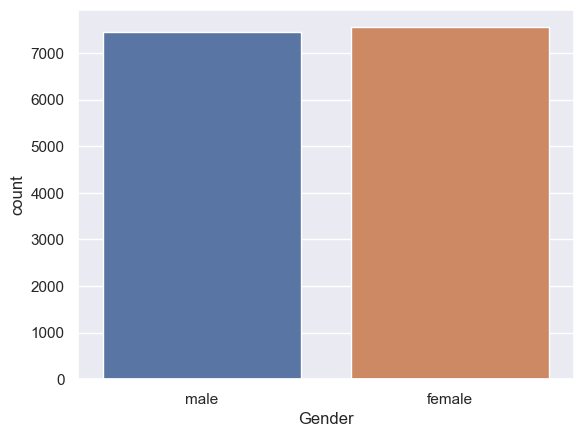

In [22]:
# plotting the gender column in count plot
sns.countplot(x='Gender', data=data)

C:\Users\Dhruv Rathi\AppData\Local\Temp\ipykernel_7980\1236118315.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

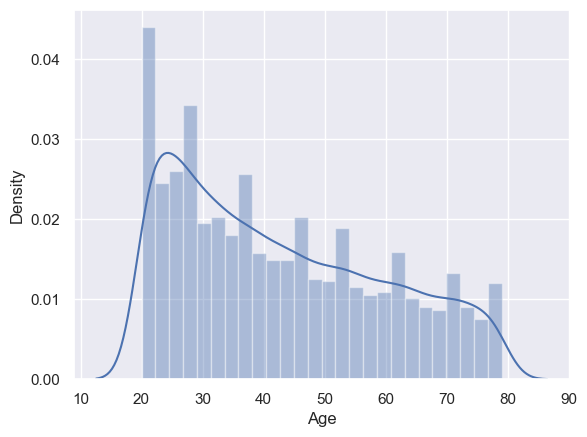

In [23]:
# finding the distribution of "Age" column
sns.distplot(data['Age'])

C:\Users\Dhruv Rathi\AppData\Local\Temp\ipykernel_7980\3316509413.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

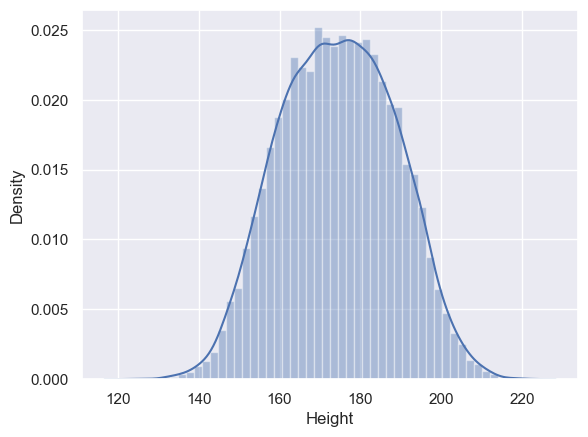

In [24]:
# finding the distribution of "Height" column
sns.distplot(data['Height'])

C:\Users\Dhruv Rathi\AppData\Local\Temp\ipykernel_7980\1019955615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

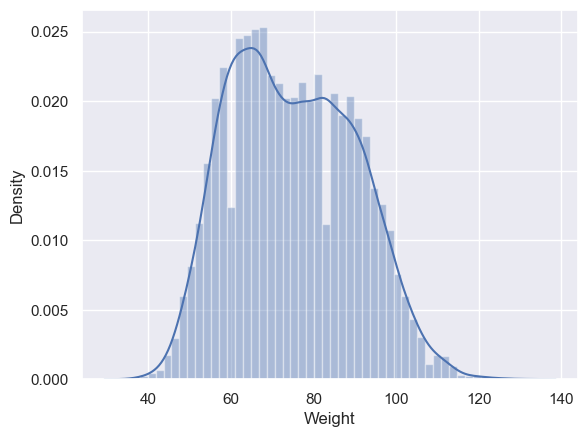

In [25]:
# finding the distribution of "Weight" column
sns.distplot(data['Weight'])

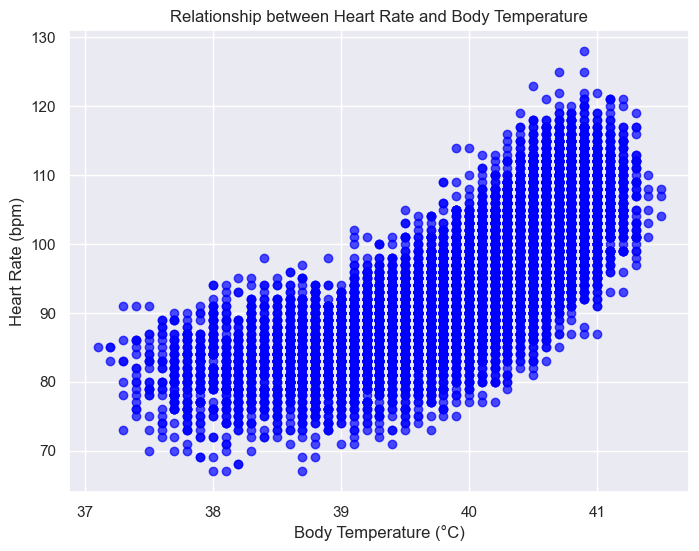

In [27]:
#Visualizing relation between heart rate and body temperature
plt.figure(figsize=(8, 6))
plt.scatter(data['Body_Temp'], data['Heart_Rate'], color='blue', alpha=0.7)
plt.title('Relationship between Heart Rate and Body Temperature')
plt.xlabel('Body Temperature (°C)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

### 6. Finding the Correlation in the dataset

In [29]:
data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [30]:
num_cols = data.drop(columns=['User_ID','Gender'], axis=1)
correlation = num_cols.corr()

<Axes: >

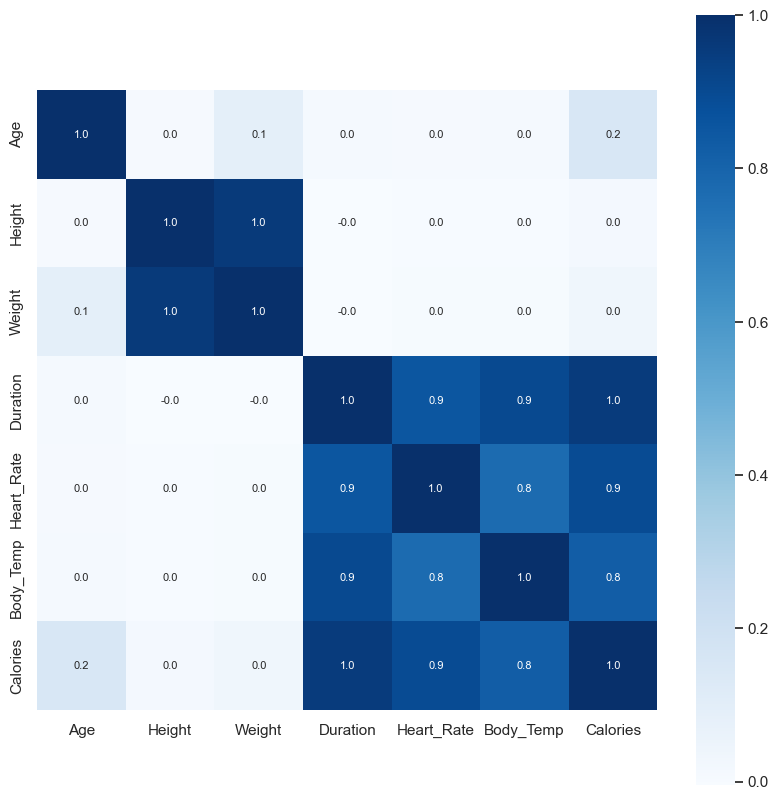

In [31]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### 7. Converting string data to numerical values

In [32]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [33]:
data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [34]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### 8.Splitting the data

In [35]:
X = data.drop(columns=['User_ID','Calories'], axis=1)
Y = data['Calories']

In [36]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [37]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [41]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(15000, 7)
(15000,)
(3000, 7)
(3000,)


### 9.Training the model

In [52]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print("Adj R-square:",adjusted_r_squared)      

R-squared: 0.9664761983139257
RMSE: 11.496793897182444
Adj R-square: 0.9664605455249848


In [58]:
#Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)

In [59]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print("Adj R-square:",adjusted_r_squared)      

R-squared: 0.9935099591832888
RMSE: 5.058524158948602
Adj R-square: 0.9935069288814133


In [60]:
#Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)

In [61]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print("Adj R-square:",adjusted_r_squared)      

R-squared: 0.9979526446274067
RMSE: 2.8411667966993184
Adj R-square: 0.9979516886850636


In [55]:
#XGBoost Regressor
xg = XGBRegressor()
xg.fit(X_train, Y_train)
Y_pred= xg.predict(X_test)

In [56]:
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared =1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
print("Adj R-square:",adjusted_r_squared)      

R-squared: 0.9987524494195072
RMSE: 2.2178348103017513
Adj R-square: 0.9987518669185692


In [49]:
def train_and_predict_models(X_train, y_train, X_test, y_test):
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'XGBoost Regressor': XGBRegressor(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(random_state=42)
    }
    
    # Train and predict for each model
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        adjusted_r_squared = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) 
        
        results[name] = {'model': model, 'r2': r2, 'rmse': rmse}
        
        # Print results
        print(f"Model: {name}")
        print(f"  R-squared: {r2:.4f}")
        print(f"  RMSE: {rmse:.2f}\n")
        print(f"  Adj R-square: {adjusted_r_squared:.4f}\n")
    
    return results

In [50]:
train_and_predict_models(X_train, Y_train, X_test, Y_test)

Model: Linear Regression
  R-squared: 0.9665
  RMSE: 11.50

  Adj R-square: 0.9665

Model: XGBoost Regressor
  R-squared: 0.9988
  RMSE: 2.22

  Adj R-square: 0.9988

Model: Decision Tree Regressor
  R-squared: 0.9936
  RMSE: 5.04

  Adj R-square: 0.9936

Model: Random Forest Regressor
  R-squared: 0.9979
  RMSE: 2.90

  Adj R-square: 0.9979



{'Linear Regression': {'model': LinearRegression(),
  'r2': 0.9664761983139257,
  'rmse': 11.496793897182444},
 'XGBoost Regressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
  'r2': 0.9987524494195072,
  'rmse': 2.2178348103017513},
 'Decision Tree Regressor': {'

## All the models are performing exceptionally well, but if we were to choose one among these we will go ahead with XGBRegressor model as the RMSE score obtained in this model is lowest as compared to the other models